In [18]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn import utils
%matplotlib inline


## Loading and Preprocessing Data

In [19]:
# Loading data
df_fires = pd.read_csv("Outputs/us_data_2020_cleaned.csv")

# Review the DataFrame
df_fires.head()

C:\Users\kentr\AppData\Local\Temp\ipykernel_1600\2906763970.py:2: DtypeWarning: Columns (2,3,4,10,12,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fires = pd.read_csv("Outputs/us_data_2020_cleaned.csv")


,FIRE_NAME,STATE,FIPS_CODE,FIRE_LATITUDE,FIRE_LONGITUDE,FIRE_DATE,CONTAIN_DATE,CLOSEST_STATION,STATION_LAT,STATION_LON,...,TMIN,PRCP,DAYS_TO_CONTAIN,Fire?,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,YELLOW ARROYO,NM,NaN,36.84713,-108.72313,2/3/2020,2/3/2020,BEAVER SPRING,36.33,-109.06,...,-125,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,5TH LANE 1,NM,NaN,36.82322,-108.7258,2/8/2020,2/10/2020,BEAVER SPRING,36.33,-109.06,...,-13,0,2,1,NaN,NaN,NaN,NaN,NaN,NaN
2,SHIPROCK 1,NM,NaN,36.78666,-108.68088,2/12/2020,2/12/2020,BEAVER SPRING,36.33,-109.06,...,-95,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,4TH LANE 1,NM,NaN,36.79949,-108.72124,2/15/2020,2/15/2020,BEAVER SPRING,36.33,-109.06,...,-41,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,TRUCK ROUTE 1,NM,NaN,36.78052,-108.68557,2/19/2020,2/19/2020,BEAVER SPRING,36.33,-109.06,...,-34,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Review the info
df_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459989 entries, 0 to 459988
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FIRE_NAME             459989 non-null  object 
 1   STATE                 459989 non-null  object 
 2   FIPS_CODE             456970 non-null  object 
 3   FIRE_LATITUDE         459989 non-null  object 
 4   FIRE_LONGITUDE        459989 non-null  object 
 5   FIRE_DATE             459989 non-null  object 
 6   CONTAIN_DATE          436313 non-null  object 
 7   CLOSEST_STATION       459989 non-null  object 
 8   STATION_LAT           459989 non-null  float64
 9   STATION_LON           459989 non-null  float64
 10  READINGS_DATE         459989 non-null  object 
 11  CAUSE_CLASSIFICATION  459989 non-null  object 
 12  FIRE_SIZE             459989 non-null  object 
 13  FIRE_SIZE_CLASS       459989 non-null  object 
 14  ELEVATION             459989 non-null  float64
 15  

In [21]:
# Drop Fire specific columns
df_fires.drop(["DAYS_TO_CONTAIN","CAUSE_CLASSIFICATION","FIRE_SIZE_CLASS","FIRE_SIZE","DAYS_TO_CONTAIN","FIRE_NAME","CLOSEST_STATION","STATE","CONTAIN_DATE","FIRE_DATE","READINGS_DATE","FIPS_CODE","FIRE_LATITUDE","FIRE_LONGITUDE"], axis=1, inplace=True) # ADD THESE COLUMNS after converting them to numeric

In [22]:
# Verify the categories of the "cause_classification" column
# df_fires["CAUSE_CLASSIFICATION"].value_counts()

In [23]:
# Verify the categories of the "fire_class" column
# df_fires["FIRE_SIZE_CLASS"].value_counts()

In [24]:
# Transform the cause_classification column using get_dummies
# classification_dummies = pd.get_dummies(df_fires["CAUSE_CLASSIFICATION"])

# # Display the transformed data
# classification_dummies.tail()

In [25]:
# Transform the fire_size_class column using get_dummies
# fire_size_class_dummies = pd.get_dummies(df_fires["FIRE_SIZE_CLASS"])

# # Display the transformed data
# fire_size_class_dummies.tail()

In [26]:
# Concatenate the DataFrames
# df_fires = pd.concat([df_fires, classification_dummies,fire_size_class_dummies], axis=1)

# # Drop the original column
# df_fires = df_fires.drop(columns=["CAUSE_CLASSIFICATION","FIRE_SIZE_CLASS"])

# # Display the DataFrame
# df_fires.head()

In [27]:
# Define features set
X = df_fires.copy()
X.drop(["Fire?"], axis=1, inplace=True) 
X.head()

,STATION_LAT,STATION_LON,ELEVATION,TAVG,TMAX,TMIN,PRCP,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,36.33,-109.06,2804.2,-49,8,-125,0,NaN,NaN,NaN,NaN,NaN,NaN
1,36.33,-109.06,2804.2,27,79,-13,0,NaN,NaN,NaN,NaN,NaN,NaN
2,36.33,-109.06,2804.2,-52,13,-95,0,NaN,NaN,NaN,NaN,NaN,NaN
3,36.33,-109.06,2804.2,4,62,-41,0,NaN,NaN,NaN,NaN,NaN,NaN
4,36.33,-109.06,2804.2,9,62,-34,0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Define target vector
y = df_fires["Fire?"].ravel()

y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [29]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train

,STATION_LAT,STATION_LON,ELEVATION,TAVG,TMAX,TMIN,PRCP,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
347075,33.69000,-109.22000,2435.4,185,284,82,0,NaN,NaN,NaN,NaN,NaN,NaN
70555,49.01670,-95.60000,329.0,80,143,18,0,NaN,NaN,NaN,NaN,NaN,NaN
122393,47.46000,-115.71000,1566.7,-32,-17,-39,102,NaN,NaN,NaN,NaN,NaN,NaN
438447,46.26000,-122.18000,1072.9,39,68,24,51,NaN,NaN,NaN,NaN,NaN,NaN
213867,30.59120,-96.36309,96.0,232,294,167,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256696,38.77000,-111.68000,2951.1,105,164,42,0,NaN,NaN,NaN,NaN,NaN,NaN
104758,48.89000,-116.76000,1536.2,-17,3,-53,127,NaN,NaN,NaN,NaN,NaN,NaN
235415,40.00000,-107.24000,2956.6,75,138,-5,25,NaN,NaN,NaN,NaN,NaN,NaN
16854,43.57751,-96.75387,432.4,154,261,94,0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [31]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

c:\Users\kentr\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\kentr\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\kentr\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [32]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [33]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [34]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Making Predictions Using the Random Forest Model

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,96774,0
Actual 1,0,18224


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96774
           1       1.00      1.00      1.00     18224

    accuracy                           1.00    114998
   macro avg       1.00      1.00      1.00    114998
weighted avg       1.00      1.00      1.00    114998



## Feature Importance

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

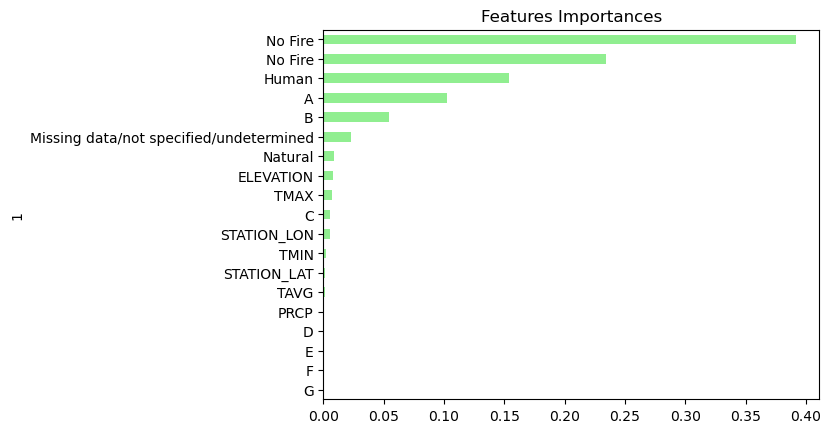

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)